# Разглеждане на дейтасета Homicide Reports, 1980-2014

[Линк към дейтасета](https://www.kaggle.com/murderaccountability/homicide-reports/data)

## Зареждане на необходимите библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
import matplotlib as mpl

from sklearn.linear_model import Lasso, LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

from sklearn.svm import SVC

from sklearn.preprocessing import \
    Imputer, \
    LabelBinarizer, \
    StandardScaler, \
    PolynomialFeatures

from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

from IPython.display import display

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()
mpl.style.use('fivethirtyeight')

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Зареждане и разглеждане на дейтасета

Дейтасета беше намален (за да може да се пушне в гитхъб).

In [2]:
data = pd.read_csv('data/reduced-homicide.csv')

In [3]:
data.sample(10)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
65894,65895,CA00710,Richmond,Municipal Police,Contra Costa,California,1983,January,1,Murder or Manslaughter,...,Not Hispanic,Male,33,Black,Not Hispanic,Unknown,Knife,0,0,FBI
172172,172173,NY03030,New York,Municipal Police,New York,New York,1988,July,40,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
200259,200260,CA01900,Los Angeles,Sheriff,Los Angeles,California,1990,August,19,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
98164,98165,PA00227,Wilkinsburg,Municipal Police,Allegheny,Pennsylvania,1984,April,1,Murder or Manslaughter,...,Not Hispanic,Male,36,White,Not Hispanic,Friend,Handgun,0,0,FBI
129054,129055,IN355SP,State Police: Morgan County,State Police,Morgan,Indiana,1986,June,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
186627,186628,LA02800,Lafayette,Sheriff,Lafayette,Louisiana,1989,May,2,Murder or Manslaughter,...,Unknown,Male,18,White,Unknown,Stranger,Strangulation,1,2,FBI
141167,141168,AL00101,Bessemer,Municipal Police,Jefferson,Alabama,1987,December,1,Murder or Manslaughter,...,Unknown,Male,31,Black,Unknown,Acquaintance,Handgun,0,0,FBI
100095,100096,TX15202,Lubbock,Municipal Police,Lubbock,Texas,1984,April,1,Murder or Manslaughter,...,Not Hispanic,Male,36,Black,Not Hispanic,Acquaintance,Handgun,0,0,FBI
139423,139424,TXDPD00,Dallas,Municipal Police,Dallas,Texas,1986,November,20,Murder or Manslaughter,...,Not Hispanic,Male,21,Black,Not Hispanic,Unknown,Handgun,0,0,FBI
98788,98789,SC00900,Calhoun,Sheriff,Calhoun,South Carolina,1984,January,2,Murder or Manslaughter,...,Not Hispanic,Male,30,Black,Not Hispanic,Acquaintance,Blunt Object,0,0,FBI


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271688 entries, 0 to 271687
Data columns (total 24 columns):
Record ID                271688 non-null int64
Agency Code              271688 non-null object
Agency Name              271688 non-null object
Agency Type              271688 non-null object
City                     271688 non-null object
State                    271688 non-null object
Year                     271688 non-null int64
Month                    271688 non-null object
Incident                 271688 non-null int64
Crime Type               271688 non-null object
Crime Solved             271688 non-null object
Victim Sex               271688 non-null object
Victim Age               271688 non-null int64
Victim Race              271688 non-null object
Victim Ethnicity         271688 non-null object
Perpetrator Sex          271688 non-null object
Perpetrator Age          271688 non-null int64
Perpetrator Race         271688 non-null object
Perpetrator Ethnicity    27168

In [5]:
data.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,271688.000000,271688.000000,271688.000000,271688.000000,271688.000000,271688.000000,271688.000000
mean,135844.500000,1986.202070,14.074821,34.991126,21.224485,0.109258,0.152204
std,78429.714305,3.955108,27.925836,34.615699,17.681596,0.522305,0.500178
min,1.000000,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,67922.750000,1983.000000,1.000000,23.000000,0.000000,0.000000,0.000000
50%,135844.500000,1986.000000,2.000000,30.000000,22.000000,0.000000,0.000000
75%,203766.250000,1990.000000,12.000000,41.000000,32.000000,0.000000,0.000000
max,271688.000000,1993.000000,994.000000,998.000000,99.000000,10.000000,10.000000


In [6]:
data.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

Нямаме празни полета, супер.

## Нека първо да дефинираме малко helper функции

In [7]:
def line_plot(data, title='Title'):
    plt.rcParams['figure.figsize'] = (15, 4)
    for line in data:
        plt.plot(line.value_counts().sort_index(ascending=True))
    plt.title(title)

In [8]:
def count_plot(data, title='Title'):
    plt.rcParams['figure.figsize'] = (15,4)
    data.value_counts().plot(kind='bar')
    plt.title(title)

In [9]:
def goup_by_plot(data, what, group_prop):
    data[what].groupby(data[group_prop]).size().plot(kind='bar')

In [10]:
def hist(data, prop_name, title='Title'):
    plt.hist(x=prop_name, data=data)
    plt.xlabel(prop_name)
    plt.ylabel('Frequency')
    plt.title(title)

In [11]:
def plot_heatmap(data, row, col):
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.crosstab(data[row], data[col]))

In [12]:
def corr_map(data_frame):
    plt.figure(figsize=(14, 12))
    plt.title('Correlation', y=1.05, size=15)
    sns.set(font_scale=0.8)
    sns.heatmap(data_frame.astype(float).corr(), square=True, annot=True, cmap=plt.cm.viridis_r)

---

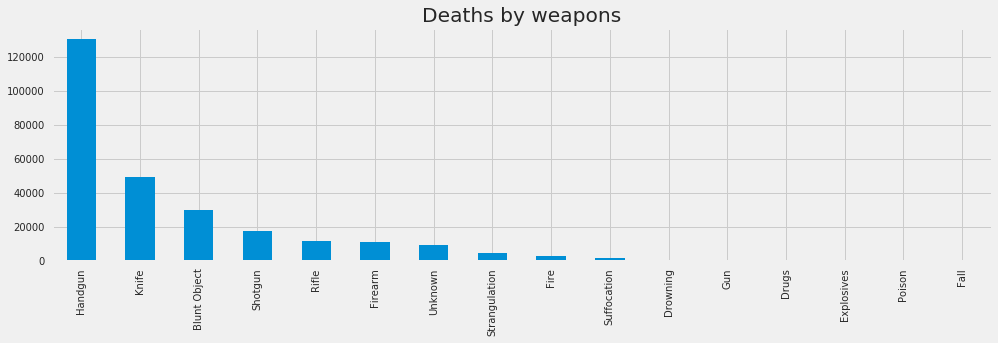

In [13]:
count_plot(data['Weapon'], 'Deaths by weapons')

Ръчният пистолет е доста популярен избор.

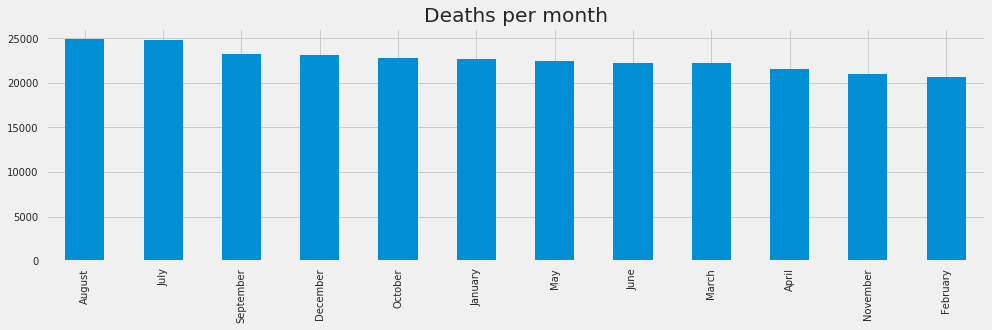

In [14]:
count_plot(data['Month'], 'Deaths per month')

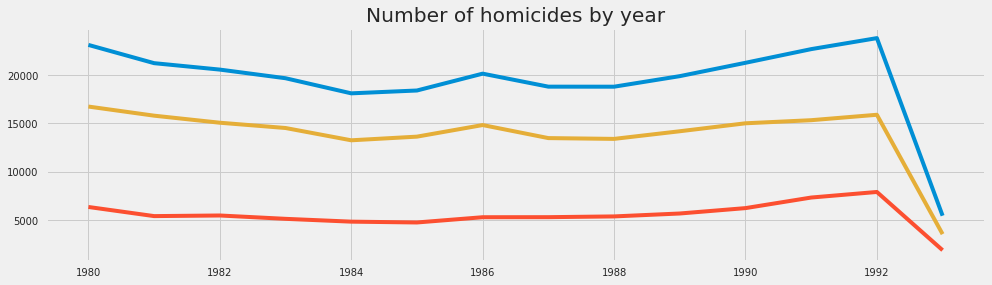

In [15]:
unsolved_crimes = data[data["Crime Solved"] != "Yes"]
solved_crimes = data[data["Crime Solved"] == "Yes"]

line_plot([data['Year'], unsolved_crimes['Year'], solved_crimes['Year']], 'Number of homicides by year')

In [16]:
solved_crimes.sample(5)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
215330,215331,SC02101,Florence,Municipal Police,Florence,South Carolina,1990,September,1,Murder or Manslaughter,...,Not Hispanic,Male,21,Black,Not Hispanic,Stranger,Blunt Object,0,0,FBI
86270,86271,CA01942,Los Angeles,Municipal Police,Los Angeles,California,1984,January,62,Murder or Manslaughter,...,Hispanic,Male,24,White,Hispanic,Acquaintance,Rifle,0,0,FBI
254436,254437,MI82349,Detroit,Municipal Police,Wayne,Michigan,1992,January,6,Murder or Manslaughter,...,Unknown,Male,16,Black,Unknown,Unknown,Firearm,0,0,FBI
2680,2681,CA01942,Los Angeles,Municipal Police,Los Angeles,California,1980,July,95,Murder or Manslaughter,...,Hispanic,Male,0,Unknown,Unknown,Stranger,Handgun,0,0,FBI
67291,67292,CA01942,Los Angeles,Municipal Police,Los Angeles,California,1983,November,54,Murder or Manslaughter,...,Not Hispanic,Male,46,Black,Not Hispanic,Acquaintance,Blunt Object,0,0,FBI


In [17]:
print('Number of unsolved crimes', unsolved_crimes.shape[0])
print('Number of solved crimes', solved_crimes.shape[0])
print('Solved/unsolved ratio', solved_crimes.shape[0] / unsolved_crimes.shape[0])

Number of unsolved crimes 77102
Number of solved crimes 194586
Solved/unsolved ratio 2.5237477627039504


---

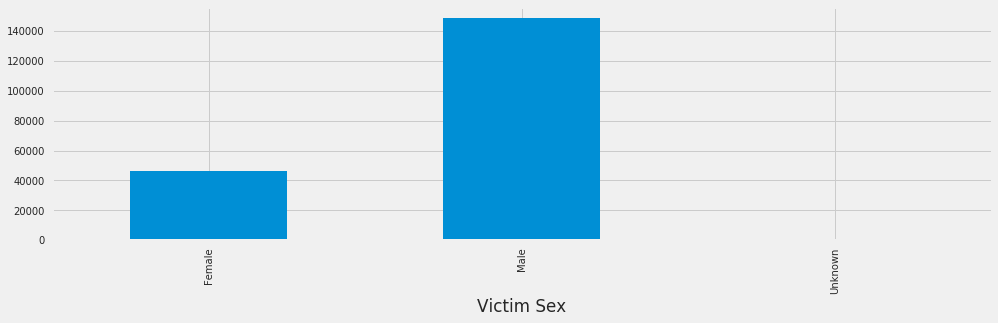

In [18]:
goup_by_plot(solved_crimes, 'Weapon', 'Victim Sex')

## Видове убийства

In [19]:
data["Crime Type"].unique()

array(['Murder or Manslaughter', 'Manslaughter by Negligence'], dtype=object)

In [20]:
manslaughter = data[data["Crime Type"] == "Murder or Manslaughter"]
manslaughter.head(5)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


Брой убийства за определен щат.

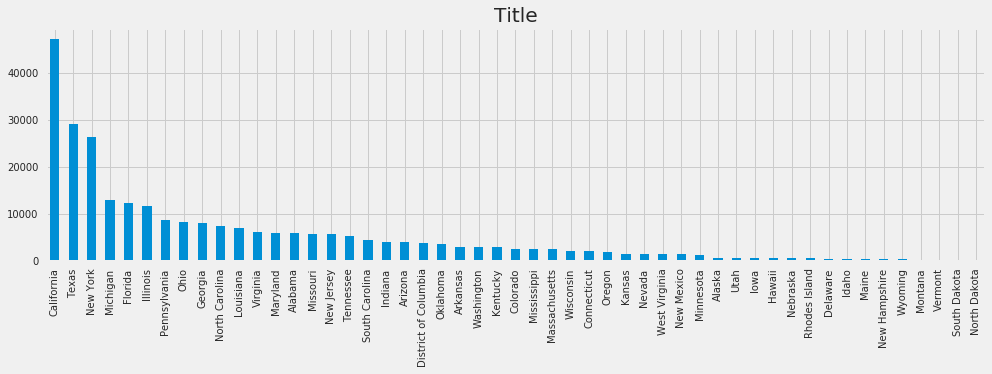

In [21]:
count_plot(manslaughter['State'])

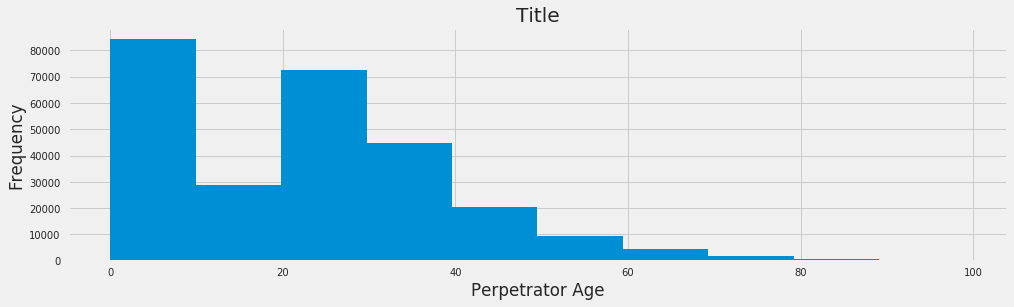

In [22]:
hist(manslaughter, 'Perpetrator Age')

Вероятността да извършиш престъпление намалява с възрастта.

---

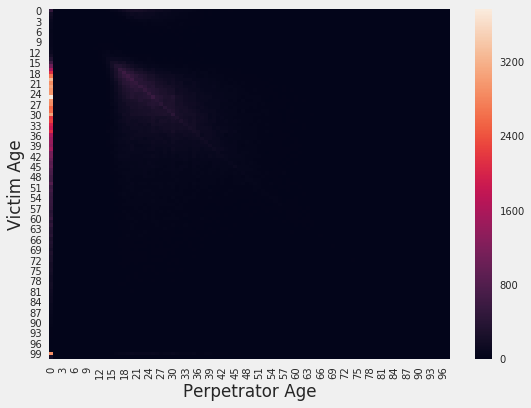

In [23]:
plot_heatmap(data, 'Victim Age', 'Perpetrator Age')

Хийт-мап на годините на извършителите и жертвите.

## Нека видим колко корелирани са част от данните.

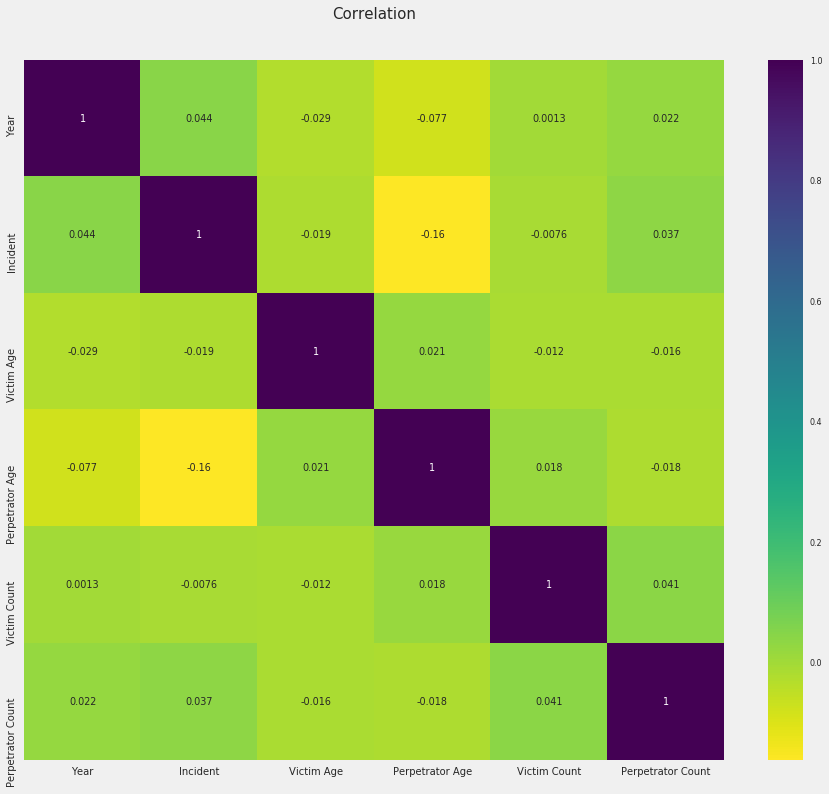

In [25]:
numeric_cols = ['Year', 'Incident', 'Victim Age', 'Perpetrator Age', 'Victim Count', 'Perpetrator Count']
corr_map(data[numeric_cols])

Не много I guess.

# THE END

![jontron](data/jontron-killer.jpg)